# Predict a Student's Performance

Importing modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')

c:\Users\rishi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Data

In [3]:
DATA = pd.read_csv('../data/raw_data/student-mat.csv')

## Exploratory Analysis

In [4]:
DATA.shape

(395, 33)

In [5]:
DATA.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
DATA.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
(DATA.isnull().sum() != 0).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

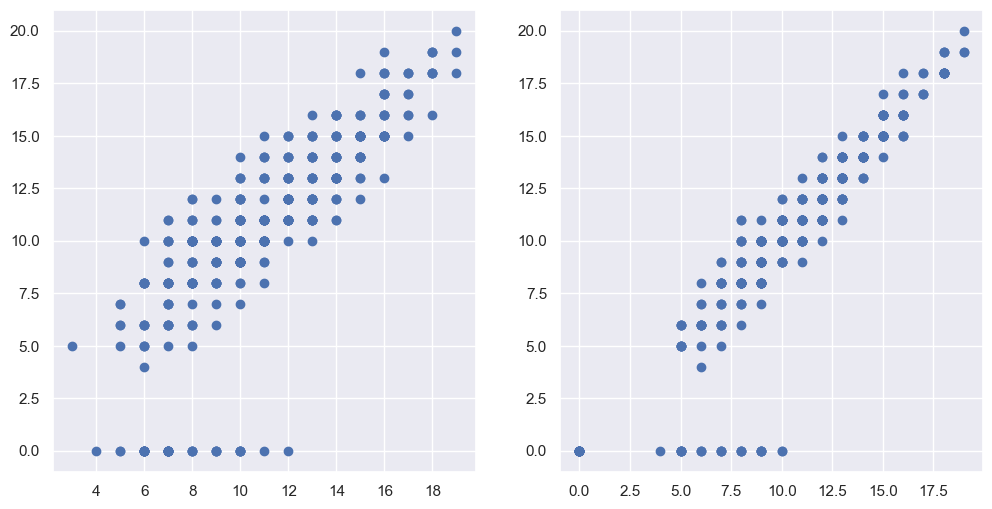

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = ax[0]
ax1.scatter(DATA['G1'], DATA['G3'])

ax2 = ax[1]
ax2.scatter(DATA['G2'], DATA['G3'])

## Getting The Dummy Variables to do the job

In [10]:
variables = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
DATA = pd.get_dummies(data=DATA, 
                      prefix=variables,
                      columns=variables,
                      dtype=int)

In [11]:
DATA.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


Obviously the result of boolean entries will be mirror images of each other, so dropping the duplicate entries

In [12]:
DATA.drop_duplicates()
DATA = DATA.drop(columns=["school_MS", "sex_F", "address_U", "famsize_GT3", "Pstatus_A", "schoolsup_no", "famsup_no", "paid_no", "activities_no", "nursery_no", "higher_no", "internet_no", "romantic_no"])
print(f"The shape of the data now becomes: {DATA.shape}")
DATA.head()

The shape of the data now becomes: (395, 46)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [13]:
Data_description = (DATA.describe())
Data_description

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,0.691139,0.081013,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.462610,0.273201,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Removing Outliers from the DATA set

In [14]:
IQ1 = Data_description.iloc[4]
IQ3 = Data_description.iloc[6]
IQR = IQ3 - IQ1
Upper = IQ3 + 1.5*IQR
Lower = IQ1 - 1.5*IQR
DATA.shape

(395, 46)

In [15]:
data_df_o1 = DATA.copy()
data_df_o1 = data_df_o1[~((data_df_o1 < Lower) | (data_df_o1 > Upper))]
data_df_o1.shape

(395, 46)

No change, hence DATA had no outliers

## Feature Engineering

In [16]:
DATA.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,-0.133558,0.398396,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,0.112375,-0.118635,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.047265,-0.091250,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,-0.057669,0.048758,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,-0.024031,0.031724,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,-0.134498,0.291157,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,-0.010983,0.049548,-0.001345,-0.020436,0.000460,0.040687,-0.003581,0.024319,0.032768,-0.063816
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,-0.028979,0.069438,-0.045465,0.010538,-0.064253,0.089728,-0.024696,-0.061244,0.051286,-0.011182
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,0.080236,-0.012380,-0.037698,-0.015631,0.010493,0.046088,0.004612,-0.039700,0.074370,0.007870
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,-0.051224,0.037626,-0.021485,-0.031575,0.062465,-0.066508,-0.084849,-0.069828,0.036210,0.015121


<AxesSubplot:>

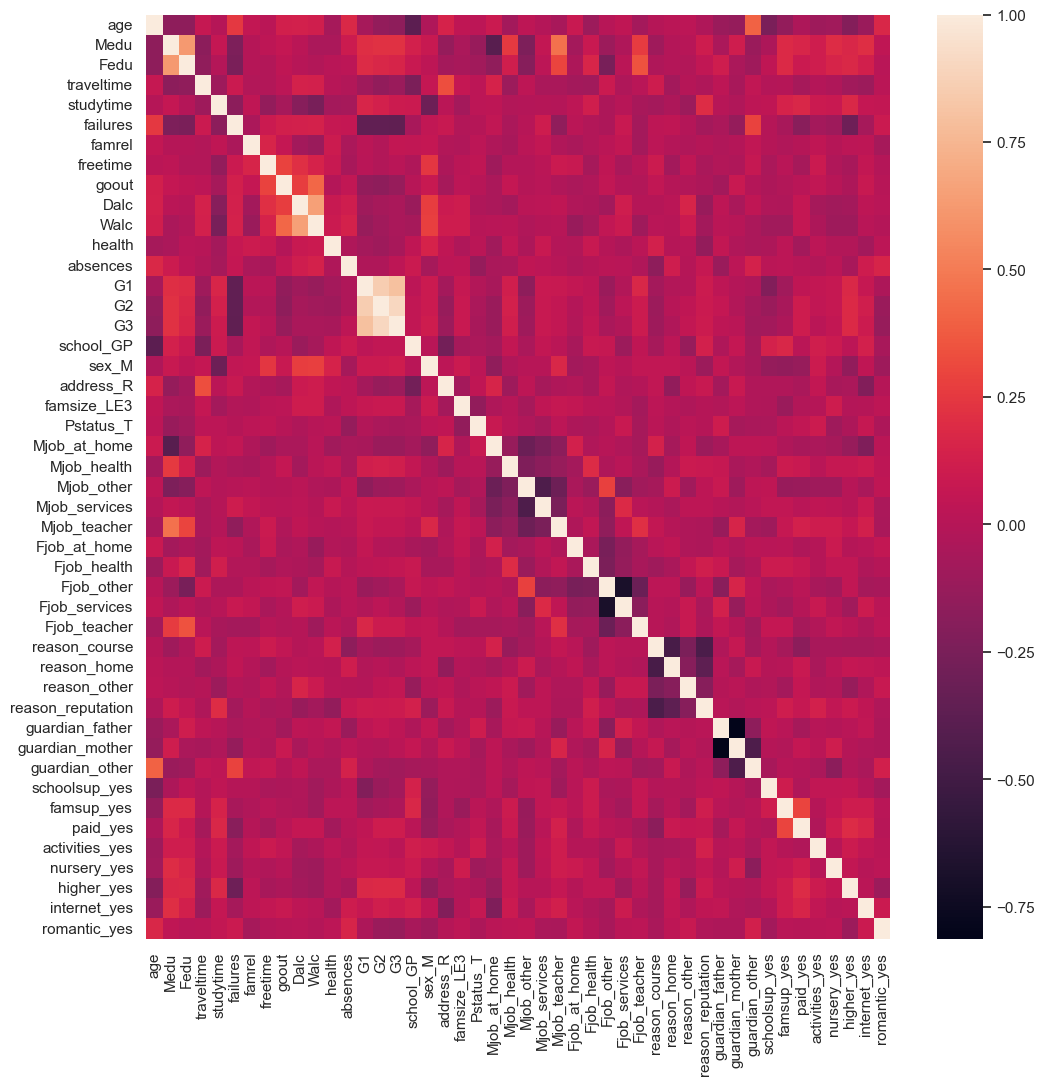

In [17]:
plt.figure(figsize = (12, 12))
sns.heatmap(DATA.corr(), annot = False)

Since our Objective is to check the performance of different models on student perferformance prediction, and here we see a very positive correlation between G1, G2, G3 we can combine these by taking the average of the grades, as the target variable

<AxesSubplot:>

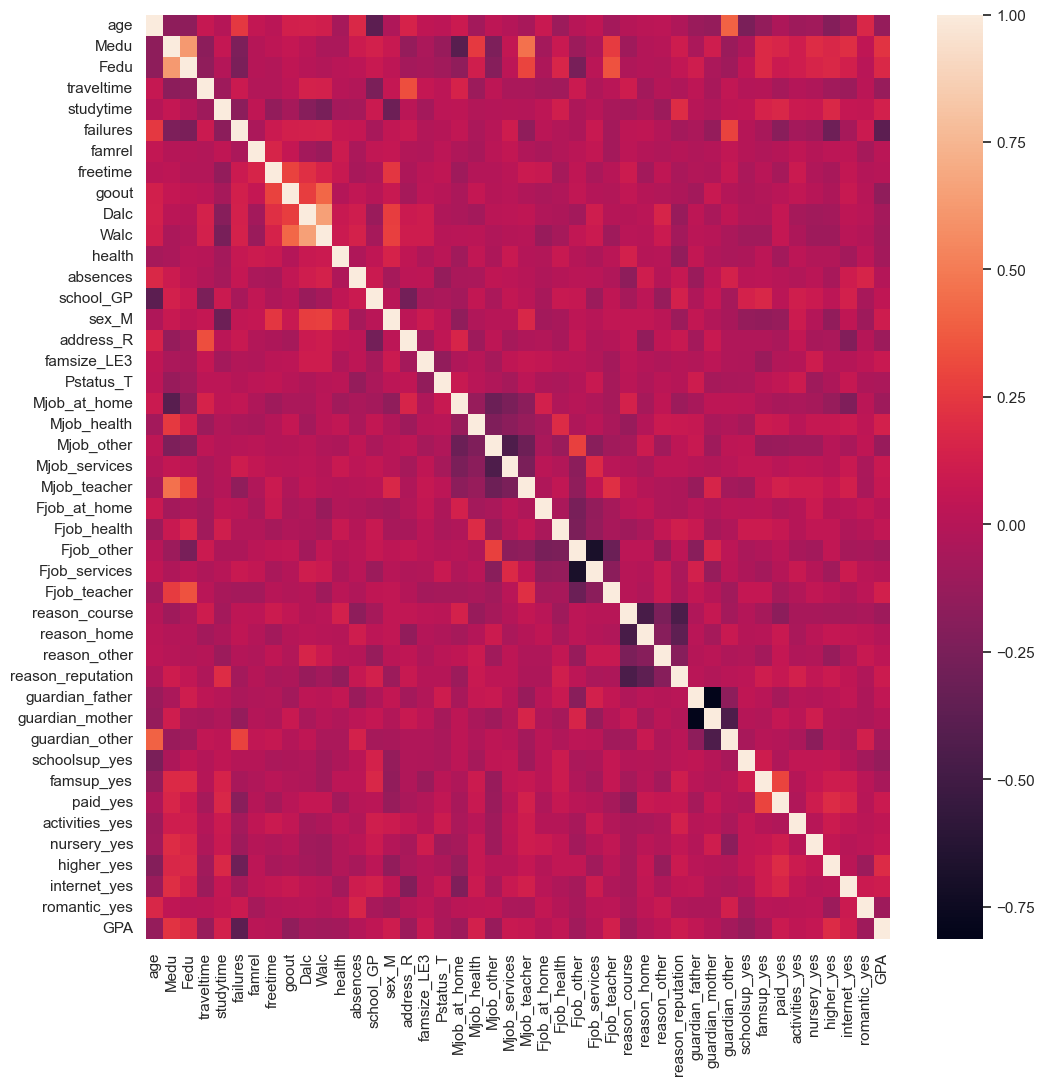

In [18]:
plt.figure(figsize = (12, 12))
DATA['GPA'] = (DATA['G1']+DATA['G2']+DATA['G3'])/3
DATA = DATA.drop(['G1', 'G2', 'G3'], axis = 1)
sns.heatmap(DATA.corr())

We see, (traveltime, failures, goout, Mjob, schoolsup, famsup, romantic) are some features that seem to effect GPA linearly

<AxesSubplot:xlabel='traveltime', ylabel='GPA'>

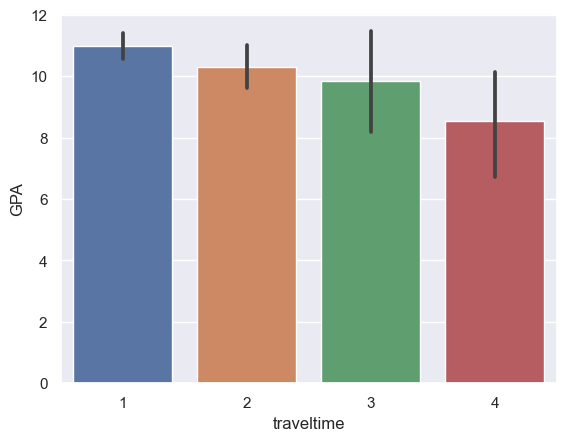

In [19]:
sns.barplot(data = DATA, x = 'traveltime', y = 'GPA')

<AxesSubplot:xlabel='failures', ylabel='GPA'>

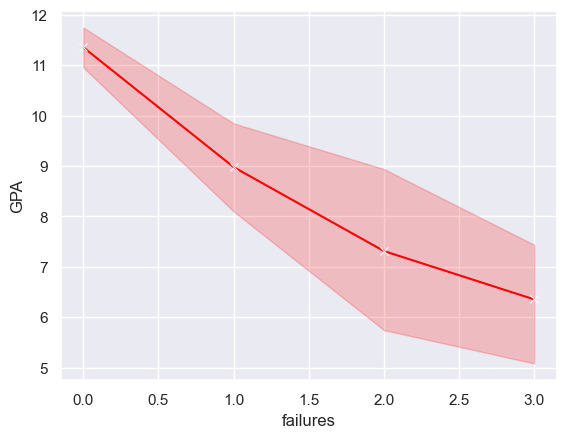

In [20]:
sns.lineplot(data = DATA, x = 'failures', y = 'GPA', marker = 'x', c = 'red')

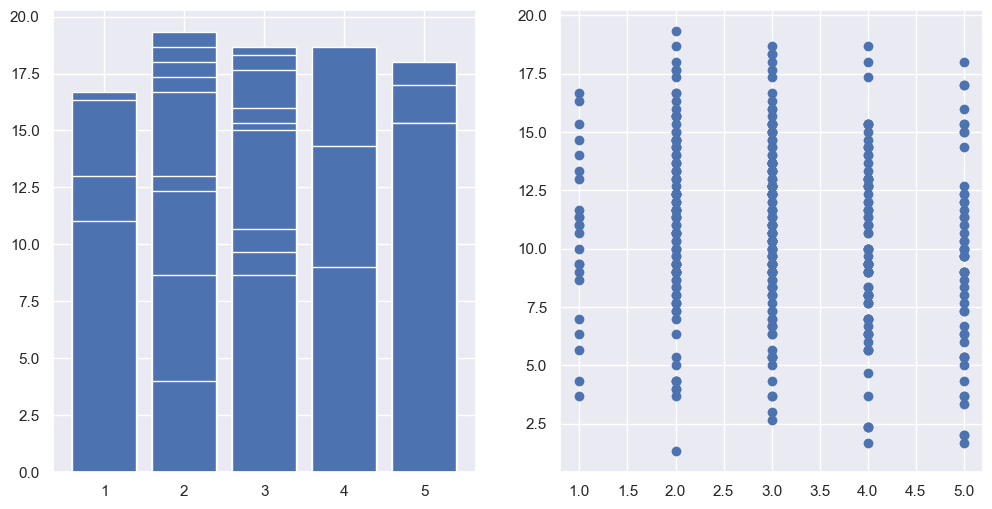

In [21]:
ax, fig = plt.subplots(1, 2, figsize = (12, 6))

axes = ax.axes[0]
axes.bar(DATA['goout'], height = DATA['GPA'])

axes = ax.axes[1]
axes.scatter(DATA['goout'], y = DATA['GPA'])

<AxesSubplot:xlabel='schoolsup_yes', ylabel='GPA'>

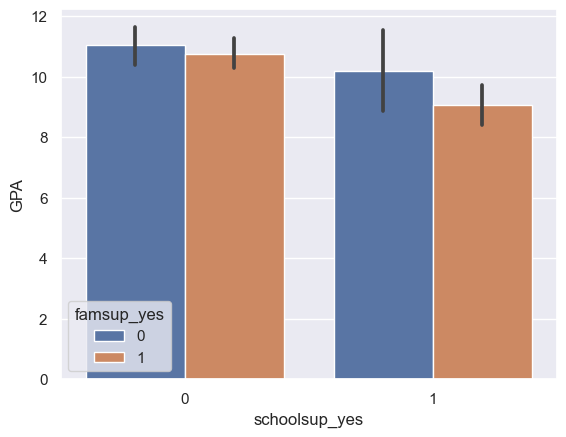

In [22]:
sns.barplot(data = DATA, x = 'schoolsup_yes', y = 'GPA', hue='famsup_yes')

<AxesSubplot:xlabel='famsup_yes', ylabel='GPA'>

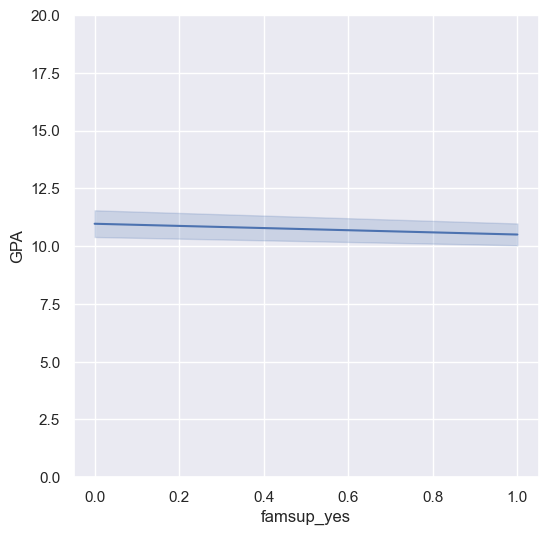

In [23]:
plt.figure(figsize=(6, 6))
plt.ylim(0, 20)
sns.lineplot(data = DATA, x = 'famsup_yes', y = 'GPA')

<AxesSubplot:xlabel='romantic_yes', ylabel='GPA'>

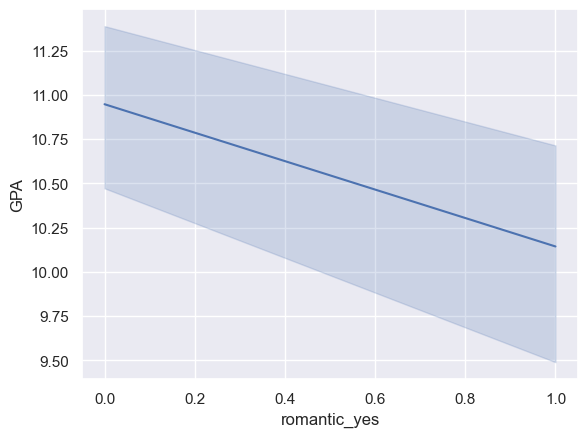

In [24]:
sns.lineplot(data = DATA, x = 'romantic_yes', y = 'GPA')

By assumption, school should not affect the grade, hence looking at the graph

<AxesSubplot:xlabel='school_GP', ylabel='GPA'>

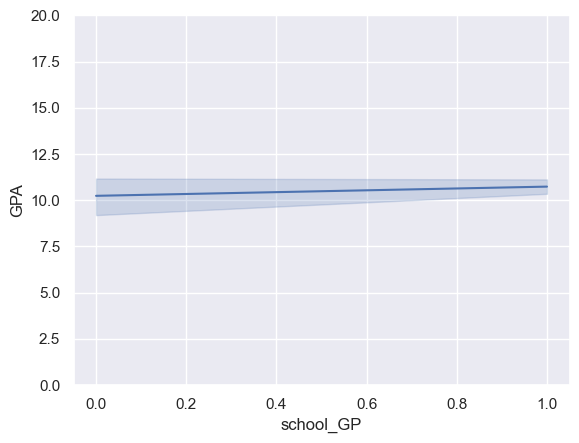

In [25]:
plt.ylim(0, 20)
sns.lineplot(data = DATA, x = 'school_GP', y = 'GPA')

Clearly visible that, this is not a significant change

<AxesSubplot:xlabel='address_R', ylabel='GPA'>

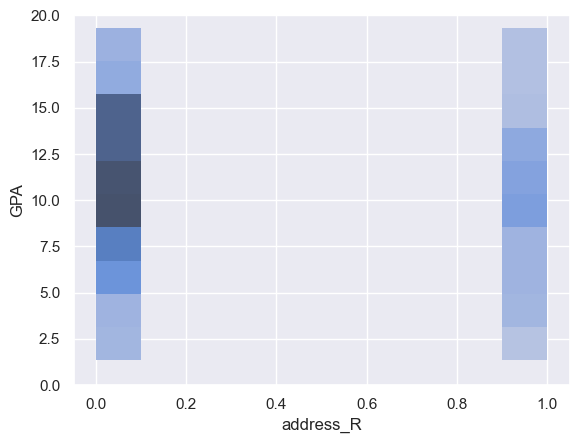

In [42]:
plt.ylim(0, 20)
sns.lineplot(data = DATA, x = 'address_R', y = 'GPA')

From the above data, we remove school_GP

In [27]:
DATA = DATA.drop('school_GP', axis = 1)

In [28]:
DATA.to_csv('../data/processed_data/student-mat.csv')